# 案例一

{'graph_output': '苹果水果店的水果很新鲜，处理完毕'}


/var/folders/bm/2cq1vtmd5wg6k0vdjfpvbmww0000gn/T/ipykernel_78032/3439054288.py:96: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder = StateGraph(
/var/folders/bm/2cq1vtmd5wg6k0vdjfpvbmww0000gn/T/ipykernel_78032/3439054288.py:96: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder = StateGraph(


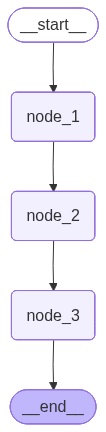

In [8]:
from typing import TypedDict

# 从 LangGraph 引入两个特殊常量：
# START：图的起点（graph 开始执行的地方）
# END：图的终点（graph 执行完毕后到达的地方）
from langgraph.constants import END, START

# StateGraph：LangGraph 的核心类，用来构建「状态机式」的多节点流程图
from langgraph.graph import StateGraph


# -----------------------------
# 1. 定义输入状态（InputState）
# -----------------------------
# TypedDict 让我们可以显式声明 state 字典内的字段和类型
# 这个状态表示「用户传入给 Graph 的输入」
class InputState(TypedDict):
    # 用户输入的文本，例如 prompt、问题、指令等
    user_input: str


# -----------------------------
# 2. 定义输出状态（OutputState）
# -----------------------------
# 这个状态表示「Graph 最终输出的内容」
class OutputState(TypedDict):
    # graph_output 是图执行后产生的最终输出
    graph_output: str


# -----------------------------
# 3. 定义整体状态（OverallState）
# -----------------------------
# 在 LangGraph 中，整体状态会随着节点执行不断更新。
# 体现 LangGraph 的「可累积、可合并、可追踪」特点。
class OverallState(TypedDict):
    # foo 是一个中间变量，用于演示数据逐步处理
    foo: str

    # 用户输入保留在 overall state 中
    user_input: str

    # 最终图运行输出
    graph_output: str


# -----------------------------
# 4. 定义私有状态（PrivateState）
# -----------------------------
# PrivateState 用来存储「仅某些节点使用」但不会暴露给最终输出的变量。
class PrivateState(TypedDict):
    # bar 是一个示例字段，用于说明私有数据
    bar: str


# ------------------------------------------------
# 5. 定义一个节点（node_1）
# ------------------------------------------------
def node_1(state: InputState) -> OverallState:
    """
    节点 1：
    将用户输入的水果名称加工成「某某水果店」
    例如：输入 “苹果” → foo = “苹果水果店”
    """
    return {
        "foo": state["user_input"] + "水果店"
    }


def node_2(state: OverallState) -> PrivateState:
    """
    节点 2：
    从 OverallState 中读取 foo，然后加工成「水果很新鲜」的句子
    例如：foo = “苹果水果店” → bar = “苹果水果店的水果很新鲜”
    """
    return {
        "bar": state["foo"] + "的水果很新鲜"
    }


def node_3(state: PrivateState) -> OutputState:
    """
    节点 3：
    最终输出，将 bar 再加上 “处理完毕” 完成整个流程
    例如：bar = “苹果水果店的水果很新鲜”
    输出 graph_output = “苹果水果店的水果很新鲜，处理完毕”
    """
    return {
        "graph_output": state["bar"] + "，处理完毕"
    }


# =====================================
# 构建 LangGraph
# =====================================
builder = StateGraph(
    OverallState,        # 整体状态类型（所有节点共享的 state）
    input=InputState,    # Graph 的输入类型（用户传入）
    output=OutputState   # Graph 的最终输出类型
)

# -------------------------------------
# 添加节点（添加执行步骤）
# -------------------------------------
builder.add_node("node_1", node_1)   # 第一个节点：处理 user_input → foo
builder.add_node("node_2", node_2)   # 第二个节点：处理 foo → bar
builder.add_node("node_3", node_3)   # 第三个节点：处理 bar → graph_output

# -------------------------------------
# 添加边（决定节点执行顺序）
# -------------------------------------
builder.add_edge(START, "node_1")    # 起点 START → node_1
builder.add_edge("node_1", "node_2") # node_1 → node_2
builder.add_edge("node_2", "node_3") # node_2 → node_3
builder.add_edge("node_3", END)      # node_3 → 终点 END

# -------------------------------------
# 编译 Graph，得到可调用的静态图
# -------------------------------------
graph = builder.compile()

# -------------------------------------
# 调用 Graph，传入 InputState
# -------------------------------------
result = graph.invoke({"user_input": "苹果"})
print(result)
# 输出示例：
# {"graph_output": "苹果水果店的水果很新鲜，处理完毕"}

# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 案例二

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='7c4962f7-db9b-46d5-a799-c5ed40ef1e27'), AIMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='18244cc5-1f37-415e-b463-728398d47f81'), AIMessage(content='LangGraph', additional_kwargs={}, response_metadata={}, id='ecb626fd-551a-406c-ae85-0370431aff51')], 'list_field': ['a', 'b', 'c', 'd', 'f'], 'another_field': 2}

===== State 字段逐项打印 =====
messages:
  - content='Hello' additional_kwargs={} response_metadata={} id='7c4962f7-db9b-46d5-a799-c5ed40ef1e27'
  - content='Hello' additional_kwargs={} response_metadata={} id='18244cc5-1f37-415e-b463-728398d47f81'
  - content='LangGraph' additional_kwargs={} response_metadata={} id='ecb626fd-551a-406c-ae85-0370431aff51'
list_field: ['a', 'b', 'c', 'd', 'f']
another_field: 2


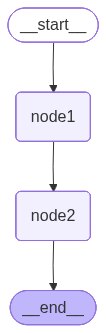

In [2]:
## 案例二

from langchain_core.messages import AnyMessage, AIMessage
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages   # 用于 Annotated，使 messages 字段支持“自动追加”
from typing import Annotated, TypedDict
from operator import add                           # 用于 Annotated，使 list_field 字段支持“自动累加”


# ============================================
# 1. 定义 State（整体状态结构）
# ============================================
class State(TypedDict):
    # messages 字段：存放消息列表
    messages: Annotated[list[AnyMessage], add_messages]

    # list_field：一个字符串列表（案例中你使用的是 ['a','b','c']）
    list_field: Annotated[list[str], add]

    # 普通字段，不参与合并
    another_field: int


# ============================================
# 2. 定义节点 node1
# ============================================
def node1(state: State):
    """
    node1:
    - 创建新的 AIMessage("Hello")
    - list_field 追加 ['d']
    - another_field = 1
    """
    new_message = AIMessage("Hello")
    return {
        "messages": [new_message],
        "list_field": ['d'],
        "another_field": 1
    }


# ============================================
# 3. 定义节点 node2
# ============================================
def node2(state: State):
    """
    node2:
    - 创建新的 AIMessage("LangGraph")
    - list_field 追加 ['f']
    - another_field = 2（此字段直接覆盖前面的）
    """
    new_message = AIMessage("LangGraph")
    return {
        "messages": [new_message],
        "list_field": ['f'],
        "another_field": 2
    }


# ============================================
# 4. 构建状态图（StateGraph）
# ============================================
graph = (
    StateGraph(State)
        .add_node("node1", node1)
        .add_node("node2", node2)
        .set_entry_point("node1")
        .add_edge("node1", "node2")
        .compile()
)


# ============================================
# 5. 调用 Graph
# ============================================
input_message = {"role": "user", "content": "Hello"}

result = graph.invoke({
    "messages": [input_message],
    "list_field": ['a', 'b', 'c']
})

# 保留你原来的打印
print(result)

# ================================
# 新增：打印 result 内各个字段的内容
# ================================
print("\n===== State 字段逐项打印 =====")
print("messages:")
for msg in result["messages"]:
    print("  -", msg)

print("list_field:", result["list_field"])
print("another_field:", result["another_field"])


# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
